In [103]:
import pandas as pd
import numpy as np
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [129]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
train.head(20)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [130]:
train.shape,test.shape

((8068, 11), (2627, 10))

In [131]:
train.nunique()

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64

In [132]:
cross = pd.crosstab(train["Var_1"],train["Segmentation"])
cross

Segmentation,A,B,C,D
Var_1,,,,
Cat_1,31,26,26,50
Cat_2,83,106,99,134
Cat_3,223,186,154,259
Cat_4,333,232,109,415
Cat_5,19,20,18,28
Cat_6,1213,1232,1496,1297
Cat_7,51,43,47,62


In [133]:
scipy.stats.chi2_contingency(cross)


(243.57726091271394,
 1.646068148998022e-41,
 18,
 array([[  32.50112613,   30.70382883,   32.43455956,   37.36048549],
        [ 103.12387387,   97.42117117,  102.91266266,  118.54229229],
        [ 200.87162162,  189.76351351,  200.46021021,  230.90465465],
        [ 266.11824324,  251.40202703,  265.5731982 ,  305.90653153],
        [  20.7713964 ,   19.62274775,   20.72885385,   23.877002  ],
        [1280.00675676, 1209.22297297, 1277.38513514, 1471.38513514],
        [  49.60698198,   46.86373874,   49.50538038,   57.0238989 ]]))

In [134]:
train.drop(labels = ["ID"],axis=1,inplace = True)
test2 = test.copy()
# test1.drop(labels = ["ID"],axis=1,inplace = True)

In [135]:
map1 = {"Yes":1,"No":0}
map2 = {"Male":1,"Female":0}
train["Gender"] = train["Gender"].map(map2)
train["Ever_Married"] = train["Ever_Married"].map(map1)
train["Graduated"] = train["Graduated"].map(map1)
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0.0,22,0.0,Healthcare,1.0,Low,4.0,Cat_4,D
1,0,1.0,38,1.0,Engineer,NaN,Average,3.0,Cat_4,A
2,0,1.0,67,1.0,Engineer,1.0,Low,1.0,Cat_6,B
3,1,1.0,67,1.0,Lawyer,0.0,High,2.0,Cat_6,B
4,0,1.0,40,1.0,Entertainment,NaN,High,6.0,Cat_6,A


In [136]:
test["Gender"] = test["Gender"].map(map2)
test["Ever_Married"] = test["Ever_Married"].map(map1)
test["Graduated"] = test["Graduated"].map(map1)
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,0,1.0,36,1.0,Engineer,0.0,Low,1.0,Cat_6
1,458994,1,1.0,37,1.0,Healthcare,8.0,Average,4.0,Cat_6
2,458996,0,1.0,69,0.0,NaN,0.0,Low,1.0,Cat_6
3,459000,1,1.0,59,0.0,Executive,11.0,High,2.0,Cat_6
4,459001,0,0.0,19,0.0,Marketing,NaN,Low,4.0,Cat_6


In [137]:
map3 = {"Low":0,"Average":1,"High":2}
map4 = {"A":1,"B":2,"C":3,"D":4}
train["Segmentation"] = train["Segmentation"].map(map4)
train["Spending_Score"] = train["Spending_Score"].map(map3)
# test["Segmentation"] = test["Segmentation"].map(map4)
test["Spending_Score"] = test["Spending_Score"].map(map3)
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0.0,22,0.0,Healthcare,1.0,0,4.0,Cat_4,4
1,0,1.0,38,1.0,Engineer,NaN,1,3.0,Cat_4,1
2,0,1.0,67,1.0,Engineer,1.0,0,1.0,Cat_6,2
3,1,1.0,67,1.0,Lawyer,0.0,2,2.0,Cat_6,2
4,0,1.0,40,1.0,Entertainment,NaN,2,6.0,Cat_6,1


In [138]:
# train.isna().sum()
train["Work_Experience"].unique()
train.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [139]:
train["Var_1"].value_counts().index[0]
train.shape

(8068, 10)

In [140]:
train["Ever_Married"] = train["Ever_Married"].fillna(np.random.randint(0,2))
test["Ever_Married"] = test["Ever_Married"].fillna(np.random.randint(0,2))
train["Graduated"] = train["Graduated"].fillna(np.random.randint(0,2))
test["Graduated"] = test["Graduated"].fillna(np.random.randint(0,2))
train["Work_Experience"] = train["Work_Experience"].fillna(train["Work_Experience"].median())
test["Work_Experience"] = test["Work_Experience"].fillna(test["Work_Experience"].median())
test["Family_Size"] = test["Family_Size"].fillna(test["Family_Size"].mean())
train["Family_Size"] = train["Family_Size"].fillna(train["Family_Size"].mean())
train.shape

(8068, 10)

In [141]:
test["Profession"] = test["Profession"].fillna(test["Profession"].value_counts().index[0])
train["Profession"] = train["Profession"].fillna(train["Profession"].value_counts().index[0])
test["Var_1"] = test["Var_1"].fillna(test["Var_1"].value_counts().index[0])
train["Var_1"] = train["Var_1"].fillna(train["Var_1"].value_counts().index[0])

In [142]:
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0.0,22,0.0,Healthcare,1.0,0,4.0,Cat_4,4
1,0,1.0,38,1.0,Engineer,1.0,1,3.0,Cat_4,1
2,0,1.0,67,1.0,Engineer,1.0,0,1.0,Cat_6,2
3,1,1.0,67,1.0,Lawyer,0.0,2,2.0,Cat_6,2
4,0,1.0,40,1.0,Entertainment,1.0,2,6.0,Cat_6,1


In [143]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train["Profession"] = le.fit_transform(train["Profession"])
test["Profession"] = le.fit_transform(test["Profession"])
# feat = ['Profession','Var_1']
# X = pd.get_dummies(train[feat])
# y = train["Segmentation"]
# X_test = pd.get_dummies(test[feat])

In [144]:
train["Var_1"] = le.fit_transform(train["Var_1"])
test["Var_1"] = le.fit_transform(test["Var_1"])
train.head(20)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0.0,22,0.0,5,1.0,0,4.000000,3,4
1,0,1.0,38,1.0,2,1.0,1,3.000000,3,1
2,0,1.0,67,1.0,2,1.0,0,1.000000,5,2
3,1,1.0,67,1.0,7,0.0,2,2.000000,5,2
4,0,1.0,40,1.0,3,1.0,2,6.000000,5,1
5,1,1.0,56,0.0,0,0.0,1,2.000000,5,3
6,1,0.0,32,1.0,5,1.0,0,3.000000,5,3
7,0,0.0,33,1.0,5,1.0,0,3.000000,5,4
8,0,1.0,61,1.0,2,0.0,0,3.000000,6,4
9,0,1.0,55,1.0,0,1.0,1,4.000000,5,3


In [145]:
# # train.isna().sum()
# train = pd.concat([train,X],axis=1)

# # train.head()
train["Profession"].unique()

array([5, 2, 7, 3, 0, 4, 1, 6, 8])

In [146]:
train.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0.0,22,0.0,5,1.0,0,4.0,3,4
1,0,1.0,38,1.0,2,1.0,1,3.0,3,1
2,0,1.0,67,1.0,2,1.0,0,1.0,5,2
3,1,1.0,67,1.0,7,0.0,2,2.0,5,2
4,0,1.0,40,1.0,3,1.0,2,6.0,5,1
5,1,1.0,56,0.0,0,0.0,1,2.0,5,3
6,1,0.0,32,1.0,5,1.0,0,3.0,5,3
7,0,0.0,33,1.0,5,1.0,0,3.0,5,4
8,0,1.0,61,1.0,2,0.0,0,3.0,6,4
9,0,1.0,55,1.0,0,1.0,1,4.0,5,3


In [147]:
y = train["Segmentation"]
train.drop(labels = ["Segmentation"],axis=1,inplace = True)
test.drop(labels = ["ID"],axis=1,inplace = True)

In [148]:
# test = pd.concat([test,X_test],axis=1)
# test.head()

In [149]:
from sklearn import preprocessing

x = train.values #returns a numpy array
test_s = test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_train = min_max_scaler.fit_transform(x)
x_scaled_test = min_max_scaler.fit_transform(test_s)
df_train = pd.DataFrame(x_scaled_train)
df_test = pd.DataFrame(x_scaled_test)
train.shape,test.shape

((8068, 9), (2627, 9))

In [150]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(df_train,y,random_state=10)

In [151]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

In [152]:

models=[]
models.append(("logreg",LogisticRegression()))
models.append(("randomF",RandomForestClassifier(n_estimators=500,
                                               criterion = 'gini')))
models.append(("tree",DecisionTreeClassifier()))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("svc",SVC(C=0.8,kernel = 'rbf',gamma = 1)))
models.append(("knn",KNeighborsClassifier(n_neighbors =18)))
models.append(("nb",GaussianNB()))

In [153]:
seed=7
scoring='accuracy'

In [154]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [155]:
for name,model in models:
    #print(model)
    kfold=KFold(n_splits=10,random_state=seed)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

logreg 0.486528 0.026901
randomF 0.485702 0.018990
tree 0.424885 0.019491
lda 0.487188 0.025550
svc 0.509996 0.015981
knn 0.493471 0.016431
nb 0.475624 0.022895


In [156]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

def elbowm(k):
    test_error = []
   
    for i in k:
        model = KNeighborsClassifier(n_neighbors = i)
        model.fit(train_X,train_y)
        tmp = model.predict(test_X)
        tmp = mse(tmp,test_y)
        error = tmp
        test_error.append(error)
    return test_error

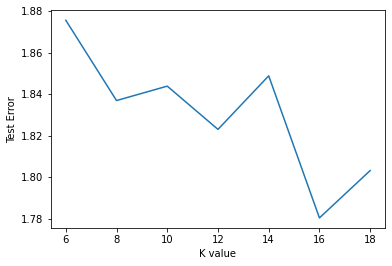

In [157]:
k = range(6,20,2)
test_e = elbowm(k)
plt.plot(k,test_e)
plt.xlabel("K value")
plt.ylabel("Test Error")
plt.show()

In [158]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svc=SVC(C=0.8,kernel = 'rbf',gamma=1)
svc.fit(train_X,train_y)
pred=svc.predict(test_X)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.5111551809618244
[[241  75  62 129]
 [149 123 125  61]
 [ 80  74 270  54]
 [124  34  19 397]]
              precision    recall  f1-score   support

           1       0.41      0.48      0.44       507
           2       0.40      0.27      0.32       458
           3       0.57      0.56      0.57       478
           4       0.62      0.69      0.65       574

    accuracy                           0.51      2017
   macro avg       0.50      0.50      0.49      2017
weighted avg       0.50      0.51      0.50      2017



In [159]:
preds = svc.predict(df_test)
df_test.shape,df_train.shape
df_train.head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.056338,0.0,0.625,0.071429,0.0,0.375,0.500000
1,0.0,1.0,0.281690,1.0,0.250,0.071429,0.5,0.250,0.500000
2,0.0,1.0,0.690141,1.0,0.250,0.071429,0.0,0.000,0.833333
3,1.0,1.0,0.690141,1.0,0.875,0.000000,1.0,0.125,0.833333
4,0.0,1.0,0.309859,1.0,0.375,0.071429,1.0,0.625,0.833333


In [160]:
preds = np.array(preds)
final = pd.DataFrame({"ID":test2.ID,"Segmentation":preds})
final

,ID,Segmentation
0,458989,2
1,458994,2
2,458996,2
3,459000,2
4,459001,4
...,...,...
2622,467954,4
2623,467958,1
2624,467960,1
2625,467961,2


In [34]:
model2 = lgb.LGBMClassifier(n_estimators=300, max_features = .2, max_depth = 15, learning_rate = 1.1).fit(train_X, train_y)

In [101]:
pred=model2.predict(df_test)

ValueError: Number of features of the model must match the input. Model n_features_ is 37 and input n_features is 9 

In [ ]:
preds = np.array(pred)
final = pd.DataFrame({"ID":test2.ID,"Segmentation":preds})
final

In [102]:
map5 = {1:"A",2:"B",3:"C",4:"D"}
final["Segmentation"] = final["Segmentation"].map(map5)

In [38]:
final.to_csv('submiss3.csv',index = False)

In [39]:
tab_info=pd.DataFrame(train.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(train.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(train.isnull().sum()/train.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
print ('-' * 10 + " Display information about column types and number of null values " + '-' * 10 )
print 
display(tab_info)

---------- Display information about column types and number of null values ----------


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
column type,int64,float64,int64,float64,int32,float64,int64,float64,int32
null values (nb),0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0


# Approach 2

In [40]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster, preprocessing, linear_model, tree, model_selection, feature_selection
from sklearn import base, ensemble, decomposition, metrics, pipeline, datasets, impute
from skopt import gp_minimize, space, gbrt_minimize, dummy_minimize, forest_minimize
from functools import partial
import os
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn import ensemble, preprocessing, tree, model_selection, feature_selection, pipeline, metrics, svm
from imblearn import under_sampling, over_sampling, combine
from imblearn import pipeline as imb_pipeline
from imblearn import ensemble as imb_ensemble
from sklearn.model_selection import StratifiedKFold

In [41]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [42]:
# View target balance/Imbalance
train['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [43]:
mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
rev_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

In [44]:
train.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A


In [45]:
## Label Encode and preprocess
train_copy  = train.copy()
test_copy = test.copy()
train_copy['tr'] = 1
test_copy['tr'] = 0

appended = pd.concat([train_copy, test_copy], axis = 0)

cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
label_enc = {}
for col in cat_cols:
    appended[col] = appended[col].astype(str)
    enc = preprocessing.LabelEncoder().fit(appended[col])
    appended[col] = enc.transform(appended[col])
    label_enc[col] = enc

cats = ['Gender', 'Ever_Married','Graduated','Profession','Spending_Score',
'Var_1']
appended = pd.get_dummies(appended, columns = cats)
##################### create features from ID column ##############
def id_features(data):
    df = data.copy()
    df['week'] = df['ID']%7
    df['month'] = df['ID']%30
    df['year'] = df['ID']%365
    df['num_weeks'] = df['ID']//7
    df['num_year'] = df['ID']//365
    df['num_quarter'] = df['ID']//90
    df['quarter'] = df['ID']%90
    df['num_days'] = df['ID'].values - 458982
    df['num_weeks_2'] = (df['ID'].values - 458982)//7
    df['num_months_2'] = (df['ID'].values - 458982)//30

    return df
def id_features(data):
    df = data.copy()
    df['week'] = df['ID']%7
    df['month'] = df['ID']%30
    df['year'] = df['ID']%365
    df['quarter'] = df['ID']%90


    return df
appended = id_features(appended)
#appended = pd.get_dummies(appended, columns = cat_cols)
train_copy = appended.loc[appended['tr'] == 1]
test_copy = appended.loc[appended['tr'] == 0]
Xcols = appended.drop(['Segmentation', 'tr'], axis = 1).columns
'''Xcols = ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']'''
ycol = 'Segmentation'

X = train_copy[Xcols]
y = train_copy[ycol]

Xtest = test_copy[Xcols]

In [46]:
############ Tune Random Forest
def optimize_sk(params, param_names, X, y, scoring, estimator, cv = model_selection.StratifiedKFold(n_splits = 5)):
    '''params: list of param values
    param_names: param names
    x: training exogs
    y: training endogs
    return: negative metric after k fold validation'''

    params = dict(zip(param_names, params))

    # Initialize the model
    model = estimator(**params)

    kf = cv

    scores = []
    for train_index, test_index in kf.split(X, y):
        # Split Data
        X_train, y_train = np.array(X)[train_index, :], y[train_index]
        X_test, y_test = np.array(X)[test_index, :], y[test_index]

        # Fit model
        im = impute.KNNImputer().fit(X_train)
        X_train = im.transform(X_train)
        model.fit(X_train, y_train)

        # Evaluate model
        preds = model.predict(im.transform(X_test))
        scores.append(scoring(y_test, preds))

    return -np.mean(scores)

# Scoring
def f1_score(y_true, y_pred):
    return metrics.f1_score(y_true, y_pred, average = 'macro')

def accuracy(y_true, y_pred):
    return metrics.accuracy_score(y_true, y_pred)

# Parameter Space
param_space = [
    space.Integer(100, 1000, name = 'n_estimators'),
    space.Integer(2, 25, name = 'max_depth'),
    space.Real(0, 1, name = 'max_features'),
    space.Integer(2, 25, name = 'min_samples_leaf'),
    space.Categorical(['gini', 'entropy'], name = 'criterion'),
    space.Categorical([None, 'balanced', 'balanced_subsample'], name = 'class_weight'),
    space.Categorical([True, False], name = 'bootstrap')
]

# Param names
names = ['n_estimators', 'max_depth', 'max_features', 'min_samples_leaf', 'criterion', 'class_weight', 'bootstrap']

cat_cols =  ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'ID']
cat_cols =  ['Var_1']

# Define objective - reformat it in terms of what is required for skopt
objective_optimization = partial(optimize_sk, param_names = names, X = X, y = y, 
                                scoring = accuracy, estimator = partial(ensemble.RandomForestClassifier, n_jobs = -1, random_state = 0))

# Perform Optimization
#gbrt_minimize, dummy_minimize, forest_minimize
'''skopt_optimization = gp_minimize(func = objective_optimization, 
                                dimensions = param_space, n_calls = 10, n_random_starts = 10, 
                                x0 = None, y0 = None, random_state = 10, 
                                verbose = 10)'''
skopt_optimization = dummy_minimize(func = objective_optimization, 
                                dimensions = param_space, n_calls = 10,
                                x0 = None, y0 = None, random_state = 10, 
                                verbose = 10)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 11.8541
Function value obtained: -0.5265
Current minimum: -0.5265
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 27.2339
Function value obtained: -0.5346
Current minimum: -0.5346
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 17.1354
Function value obtained: -0.5275
Current minimum: -0.5346
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 42.6591
Function value obtained: -0.5306
Current minimum: -0.5346
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 11.2164
Function value obtained: -0.5316
Current minimum: -0.5346
Iteration No: 6 star

In [47]:
model = pipeline.make_pipeline(impute.KNNImputer(), 
                               ensemble.RandomForestClassifier(**dict(zip(names, skopt_optimization.x)), 
                                                               n_jobs = -1, random_state = 0)).fit(X, y)


In [48]:
dict(zip(names, skopt_optimization.x))

{'n_estimators': 981,
 'max_depth': 10,
 'max_features': 0.26556612677209707,
 'min_samples_leaf': 12,
 'criterion': 'gini',
 'class_weight': 'balanced_subsample',
 'bootstrap': False}

In [49]:
from sklearn import impute, pipeline
model_cb = cb.CatBoostClassifier( verbose = False)

model_lgb = lgb.LGBMClassifier(n_estimators = 1000, min_samples_in_leaf = 10, learning_rate = .02, 
                          feature_fraction = .8, max_depth = 8)

# Soft Voting Classifier
model_voting = ensemble.VotingClassifier([('catboost', model_cb), ('lightgbm', model_lgb)], 
                                         voting = 'soft').fit(X, y)

In [50]:
model4 = pipeline.make_pipeline(impute.KNNImputer(n_neighbors = 10), ensemble.RandomForestClassifier(class_weight = 'balanced_subsample',
                    n_estimators = 200, max_depth = 20, criterion = 'entropy', max_features = .8, oob_score = True, random_state = 0)).fit(X, y)

In [51]:
# .94
model2 = lgb.LGBMClassifier(n_estimators=300, max_features = .85, max_depth = 15, learning_rate = 1.1).fit(X, y)

In [52]:
!pip install rfpimp

In [53]:
import rfpimp

imp = rfpimp.importances(model2, X, y)
imp

,Importance
Feature,
Age,0.1680
ID,0.1294
year,0.1112
quarter,0.0564
month,0.0332
Work_Experience,0.0310
Family_Size,0.0258
Profession_0,0.0172
Profession_5,0.0138


In [54]:
pred = pd.DataFrame()
pred['ID'] = test['ID'].values
pred['Segmentation'] = pd.Series(model2.predict(Xtest))
pred.to_csv('Seg.csv', index = None)

In [55]:
pred

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,C
...,...,...
2622,467954,D
2623,467958,A
2624,467960,A
2625,467961,B


In [162]:
import pickle
with open('segment2.pkl', 'wb') as file:
    pickle.dump(svc, file)